In [ ]:
# MATTHEW POHLHAUS
# CMSC320

In [ ]:
import sqlite3 as sql
import pandas
import matplotlib.pyplot as mpl
import numpy as np

# PART 1

Connect to the SQL database and begin querying

In [ ]:
sqlite_file = 'lahman2014.sqlite'
conn = sql.connect(sqlite_file)

In [ ]:
salary_query = "SELECT yearID, teamID as team, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID"

I used a separate query to get the salaries, because SQL did not want to behave when I joined it with the other table. It would work, but would give me the wrong values with a lot of duplicates.

In [ ]:
team_salaries = pandas.read_sql(salary_query, conn)

This is the larger query for the larger table (Teams). By using inner join with the yearIDs, we can account for the fact that the Salaries table does not include data from before 1985

In [ ]:
part1_query = \
"SELECT Teams.yearID as year, \
    Teams.teamID as team_ID, \
    Teams.franchID as franchise, \
    Teams.G as games, Teams.W as wins, \
    (CAST(Teams.W AS float) / CAST(Teams.G AS float))*100 as win_percent \
    FROM Teams \
INNER JOIN Salaries ON Teams.yearID=Salaries.yearID \
GROUP BY Teams.teamID, Teams.yearID \
ORDER BY Teams.yearID"

In [ ]:
data = pandas.read_sql(part1_query, conn)
data

,year,team_ID,franchise,games,wins,win_percent
0,1985,ATL,ATL,162,66,40.740741
1,1985,BAL,BAL,161,83,51.552795
2,1985,BOS,BOS,163,81,49.693252
3,1985,CAL,ANA,162,90,55.555556
4,1985,CHA,CHW,163,85,52.147239
...,...,...,...,...,...,...
853,2014,SLN,STL,162,90,55.555556
854,2014,TBA,TBD,162,77,47.530864
855,2014,TEX,TEX,162,67,41.358025
856,2014,TOR,TOR,162,83,51.234568


Now I have my two tables, so I must get the appropriate information and join them together so that salaries are included

In [ ]:
salaries = []
data_index = 0
sal_index = 0
# I did this this way because of either duplicate or missing values between the two tables. 
# I checked manually and this seemed to fix the problem and match the values correctly
while data_index < 858 and sal_index < 860:
    if team_salaries.iloc[sal_index]['team'] == data.iloc[data_index]['franchise'] or team_salaries.iloc[sal_index]['team'] == data.iloc[data_index]['team_ID']:
        salaries.append(team_salaries.iloc[sal_index]['total_payroll'])
        data_index += 1
        sal_index += 1
    else:
        sal_index += 1

I can now complete the larger table with appropriate payroll data :D

In [ ]:
data['payroll'] = salaries
data

,year,team_ID,franchise,games,wins,win_percent,payroll
0,1985,ATL,ATL,162,66,40.740741,14807000.0
1,1985,BAL,BAL,161,83,51.552795,11560712.0
2,1985,BOS,BOS,163,81,49.693252,10897560.0
3,1985,CAL,ANA,162,90,55.555556,14427894.0
4,1985,CHA,CHW,163,85,52.147239,9846178.0
...,...,...,...,...,...,...,...
853,2014,SLN,STL,162,90,55.555556,120693000.0
854,2014,TBA,TBD,162,77,47.530864,72689100.0
855,2014,TEX,TEX,162,67,41.358025,112255059.0
856,2014,TOR,TOR,162,83,51.234568,109920100.0


# PART 2

I went and created second queries herefor the two tables, not only to make sure I was only using data from 1990 and not earlier, but also to make a table where the values were ordered and grouped in a more specific way I wanted that would make future tasks easier

In [ ]:
altered_query = \
"SELECT Teams.yearID as year, \
    Teams.teamID as team_ID, \
    Teams.franchID as franchise, \
    Teams.G as games, Teams.W as wins, \
    (CAST(Teams.W AS float) / CAST(Teams.G AS float))*100 as win_percent \
FROM Teams \
INNER JOIN Salaries ON Teams.yearID=Salaries.yearID \
WHERE year >= 1990 \
GROUP BY Teams.teamID, Teams.yearID \
ORDER BY Teams.teamID"

In [ ]:
data2 = pandas.read_sql(altered_query, conn)
data2

,year,team_ID,franchise,games,wins,win_percent
0,1997,ANA,ANA,162,84,51.851852
1,1998,ANA,ANA,162,85,52.469136
2,1999,ANA,ANA,162,70,43.209877
3,2000,ANA,ANA,162,82,50.617284
4,2001,ANA,ANA,162,75,46.296296
...,...,...,...,...,...,...
723,2010,WAS,WSN,162,69,42.592593
724,2011,WAS,WSN,161,80,49.689441
725,2012,WAS,WSN,162,98,60.493827
726,2013,WAS,WSN,162,86,53.086420


In [ ]:
alt_sal_query = "SELECT yearID, teamID as team, sum(salary) as total_payroll FROM Salaries WHERE yearID >= 1990 GROUP BY teamID, yearID ORDER BY teamID"
salaries2 = pandas.read_sql(alt_sal_query, conn)
salaries2

,yearID,team,total_payroll
0,1997,ANA,31135472.0
1,1998,ANA,41281000.0
2,1999,ANA,55388166.0
3,2000,ANA,51464167.0
4,2001,ANA,47535167.0
...,...,...,...
725,2010,WAS,61400000.0
726,2011,WAS,63856928.0
727,2012,WAS,80855143.0
728,2013,WAS,113703270.0


Here I am just repeating the process of organizing the salaries appropriately so that the values are correct, done with the same method as before

In [ ]:
salaries = []
data_index = 0
sal_index = 0
while data_index < 728 and sal_index < 730:
    if salaries2.iloc[sal_index]['team'] == data2.iloc[data_index]['franchise'] or salaries2.iloc[sal_index]['team'] == data2.iloc[data_index]['team_ID']:
        salaries.append(salaries2.iloc[sal_index]['total_payroll'])
        data_index += 1
        sal_index += 1
    else:
        sal_index += 1

And here is the actual table that I use for the rest of the project :D

In [ ]:
data2['payroll'] = salaries
data2

,year,team_ID,franchise,games,wins,win_percent,payroll
0,1997,ANA,ANA,162,84,51.851852,31135472.0
1,1998,ANA,ANA,162,85,52.469136,41281000.0
2,1999,ANA,ANA,162,70,43.209877,55388166.0
3,2000,ANA,ANA,162,82,50.617284,51464167.0
4,2001,ANA,ANA,162,75,46.296296,47535167.0
...,...,...,...,...,...,...,...
723,2010,WAS,WSN,162,69,42.592593,61400000.0
724,2011,WAS,WSN,161,80,49.689441,63856928.0
725,2012,WAS,WSN,162,98,60.493827,80855143.0
726,2013,WAS,WSN,162,86,53.086420,113703270.0


Now for the plots -- the first thing that I do here is break up the larger table into many smaller tables, one for each team storing all of them in a list. It was already ordered by team name, making this step easier

In [ ]:
stuff = []
upper_bound = 0
lower_bound = 0
curr = data2.iloc[0]['team_ID']
for row in data2.iterrows():
    if row[1]['team_ID'] == curr:
        upper_bound += 1
    else:
        curr = row[1]['team_ID']
        stuff.append(pandas.DataFrame(data2.iloc[lower_bound:upper_bound]))
        lower_bound = upper_bound
        upper_bound += 1


I then went through the list of tables I had just created and generated a plot for each team's payroll

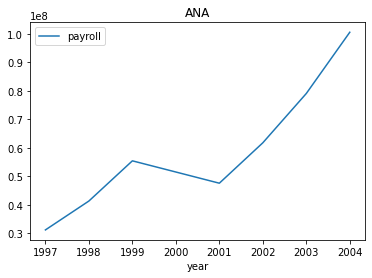

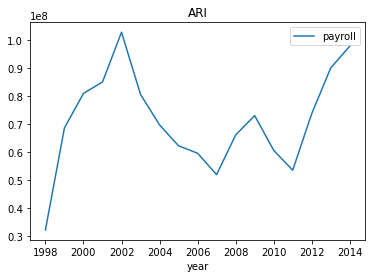

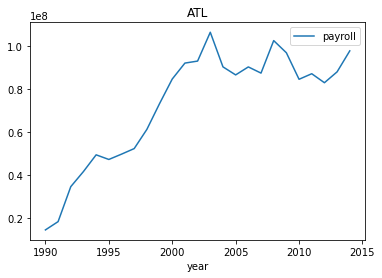

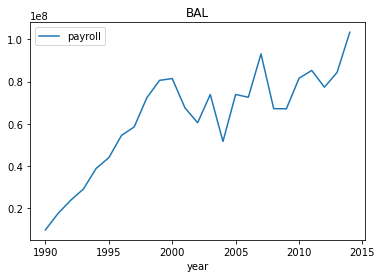

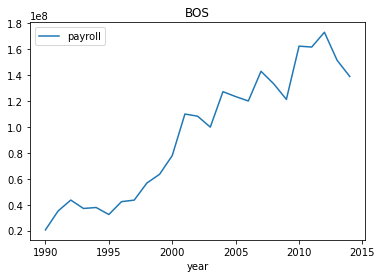

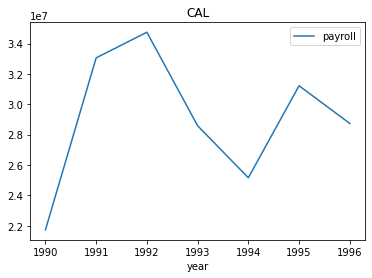

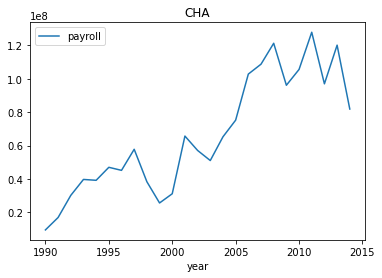

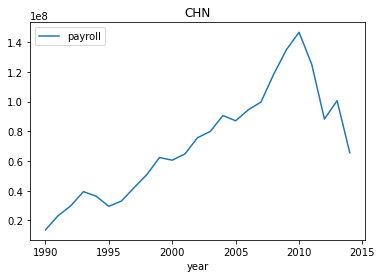

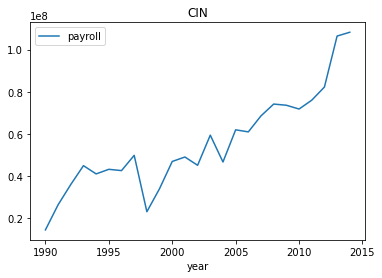

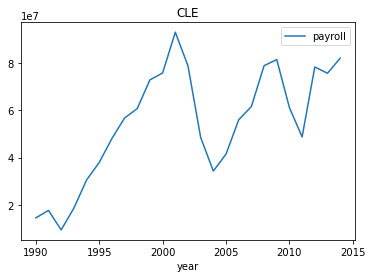

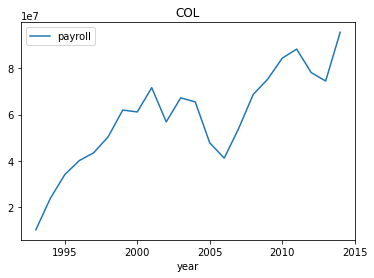

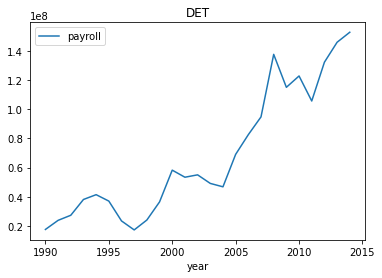

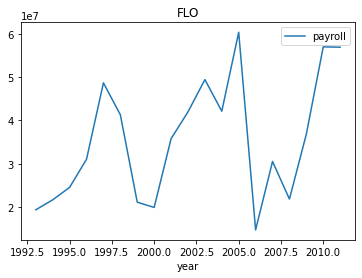

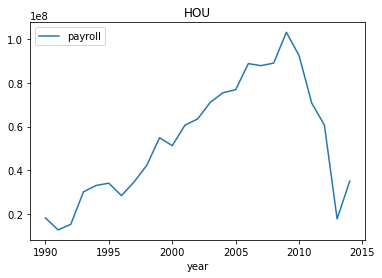

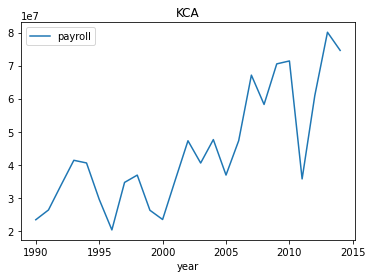

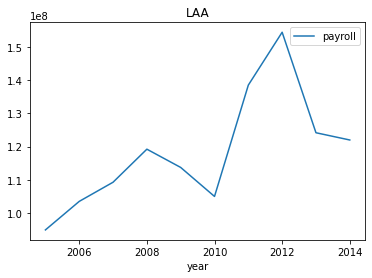

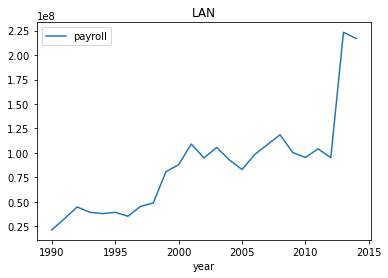

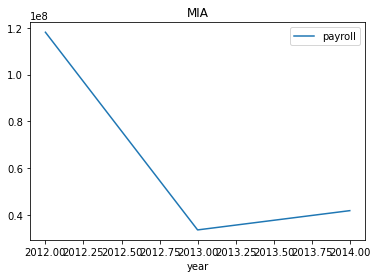

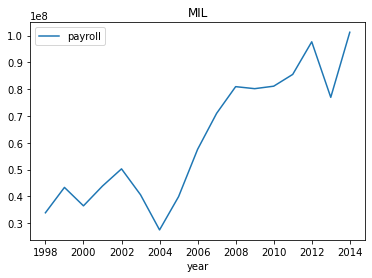

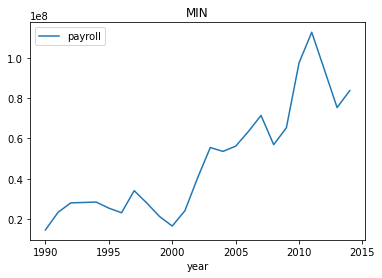

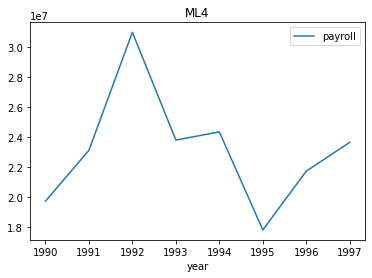

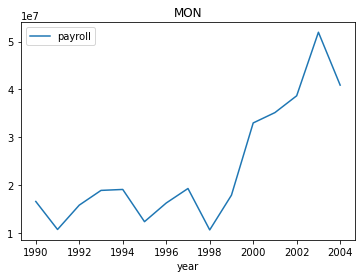

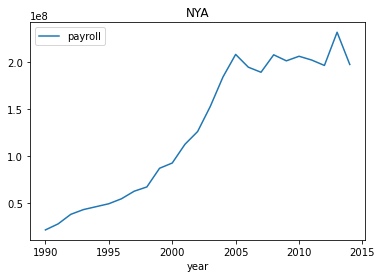

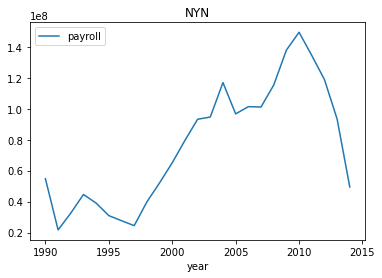

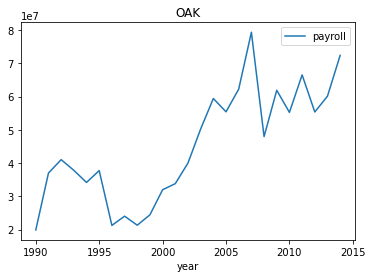

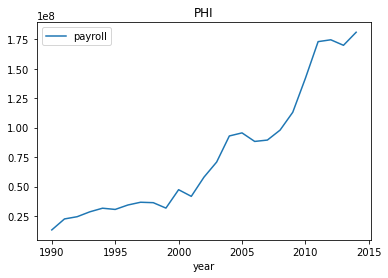

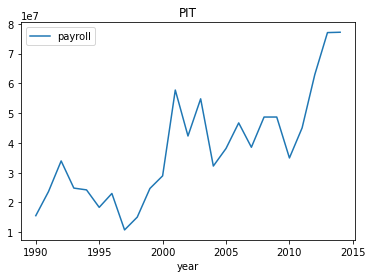

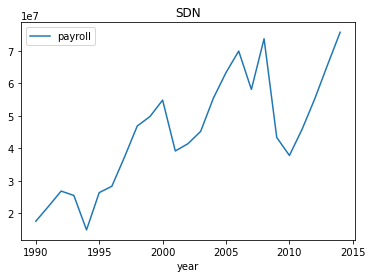

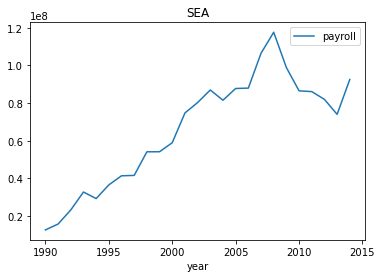

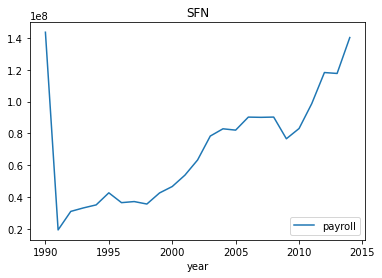

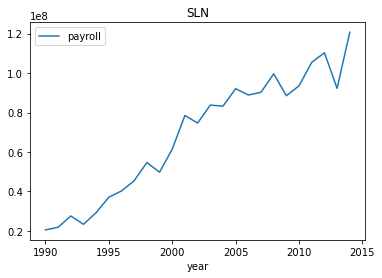

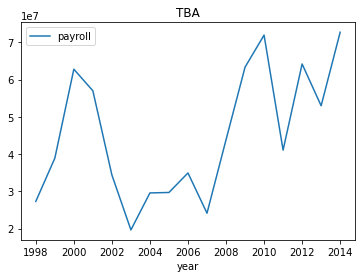

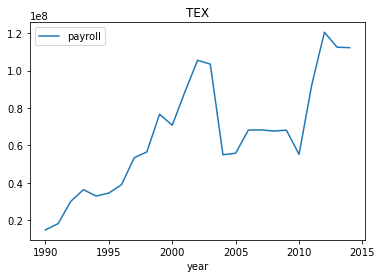

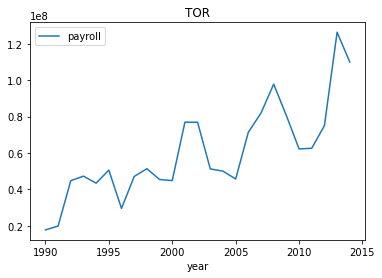

In [ ]:
for df in stuff:
    axes = mpl.gca()
    df.plot(kind='line', x='year', y='payroll', ax=axes)
    
    mpl.title(df.iloc[0]['team_ID'])
    mpl.show()

Overall, the average salary trended up from 1990 - 2014 for the league. There were many different behaviors in these trends among the teams, and even a couple whose trend behavior was different from that of the rest of the league, but the trend for the entire league for team payroll was that it went upward to sharp extents from 1990 to 2015, even in teams that paid less than others

Here I wrote code to show the average payroll across ALL teams by year, and plotted it to illustrate how much the average team payroll for the entire league increased over 1990-2015

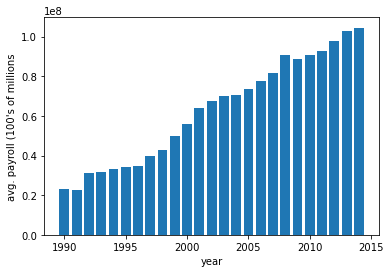

In [ ]:
averages = []
vals = 0
# Reordered the table from being sorted by team name to being ordered by year to make this point more intuitive to make from the data
data2_reordered = data2.sort_values('year')
curr = 1990
sum = 0
for row in data2_reordered.iterrows():
    if row[1]['year'] == curr:
        sum += row[1]['payroll']
        vals += 1
    else:
        curr = row[1]['year']
        averages.append(sum / vals)
        sum = 0
        vals = 0
averages.append(sum / vals)
mpl.bar(range(1990, 2015), averages)
mpl.xlabel('year')
mpl.ylabel('avg. payroll (100\'s of millions')
mpl.show()

Here I break up the table into time periods across 5-year increments to calculate mean winning percentage and mean payroll for each team and plot them against each other in their own respective plots. To do this I labeled each table entry indicating which time period that it belonged in, and then based on these groupings I broke the table up into 5 smaller tables and plotted each of them

In [ ]:
stuff = []
# Breaking up the table into groups based on where they land in the time periods
data2_reordered['time group'] = pandas.cut(x=data2_reordered['year'], bins=[1990,1995,2000,2005,2010, 2015], labels = [1,2,3,4,5], right=False)
# I then reorder the table respective to the time period
data2_reordered.sort_values(['time group'])
# Create smaller the tables and store them
lower = 0
upper = 0
curr = 1
for row in data2_reordered.iterrows():
    if row[1]['time group'] == curr:
        upper += 1
    else:
        curr = row[1]['time group']
        stuff.append(pandas.DataFrame(data2_reordered.iloc[lower:upper]))
        lower = upper
        upper += 1
stuff.append(pandas.DataFrame(data2_reordered.iloc[lower:upper]))

So now that I have my smaller tables, here is where I start calculating data for each of them. The 'win' and 'pay' dictionaries each have keys 0,1,2,3, and 4, representing which 5-year time period that data is from, and the values will be other dictionaries that map teams to their average win rate or payroll, respectively, over the given time period

In [ ]:
win = {}
pay = {}
for i in range(len(stuff)):
    avg_win = {}
    avg_pay = {}
    for row in stuff[i].iterrows():
        if avg_win.get(row[1]['franchise'], -1) != -1:
            continue
        data = stuff[i].loc[stuff[i]['franchise'] == row[1]['franchise']]
        avg_win[row[1]['franchise']] = data['win_percent'].mean()
        avg_pay[row[1]['franchise']] = data['payroll'].mean()
    win[i] = avg_win
    pay[i] = avg_pay

At this step I have stored the necessary data for each team per each time period, so all that is left is to plot them! I just generated one scatterplot for each of the 5-year periods, labeling each team, and including a line of best fit to indicate each team's distance from the average payroll for that time period

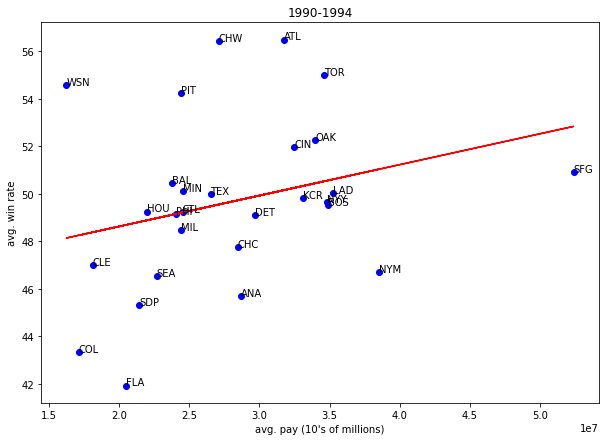

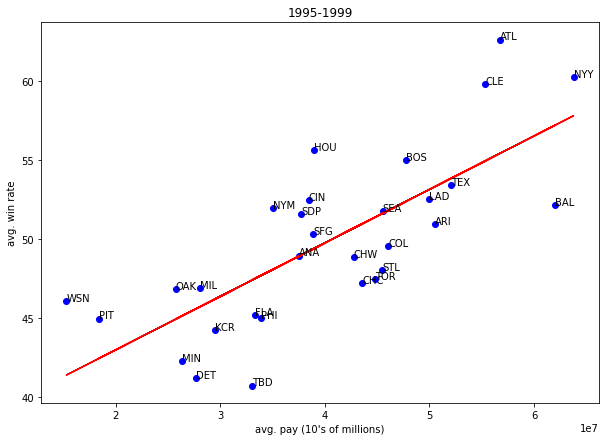

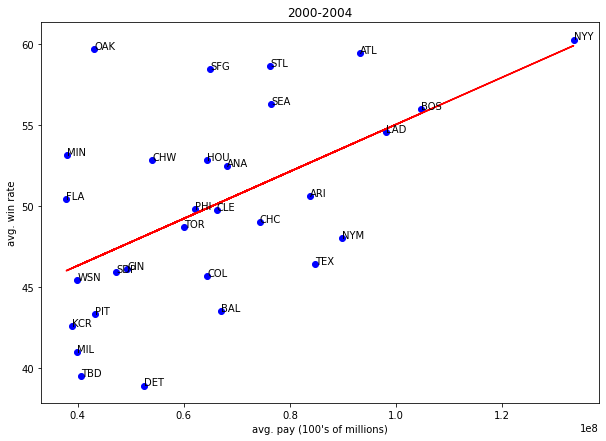

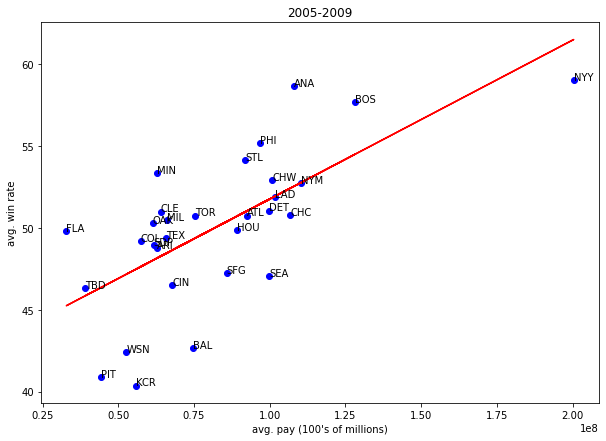

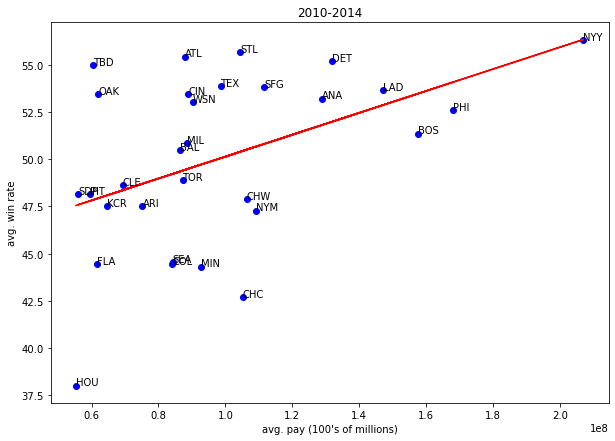

In [ ]:
titles = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']
for i in range(len(win.values())):
    x = np.array(list(pay[i].values()))
    y = np.array(list(win[i].values()))
    m, b = np.polyfit(x,y,1)

    mpl.figure(figsize=(10, 7))
    mpl.scatter(x, y, color='Blue')
    # THIS line right here is what creates the line of best fit, so each point can be compared to the average
    mpl.plot(x, (m*x) + b, color="Red")
    mpl.title(titles[i])
    if i < 2:
        mpl.xlabel("avg. pay (10\'s of millions)")
    else:
        mpl.xlabel("avg. pay (100\'s of millions)")
    mpl.ylabel("avg. win rate")

    # This adds labels to each point in the scatter plot
    for j in win[i].keys():
        mpl.text(x=pay[i][j], y=win[i][j], s=j)
    mpl.show()

Over this period, a lot of teams did very well that had high payrolls. Particularly, big teams, most notably NY, Boston, Philadelphia, and Atlanta, who are quite popular teams, had very high win rates and very high payrolls. New York especially was killing it in every one of the time frames. A couple of teams, most notably Oakland, however, seemed to have managed to get impressively high win rates with comparably low payrolls, not just compared to the biggest winning teams but to all of them.

# PART 3

The first thing that I did for this was to gather all of the average payrolls for each year from my table. This will make the calculaton for standardized payroll a lot simpler to have everything in one place

In [ ]:
averages = {}
for i in range(1990, 2015):
    averages[i] = (data2_reordered.loc[data2_reordered['year'] == i]['payroll'].mean())

Using this data, I am now able to create a new column in the table for the standardized pay, using the calculation for standardized payroll(i, j) for team i in year j

In [ ]:
std_pay = []
for row in data2_reordered.iterrows():
    # Get the payroll for this team this year
    pay = row[1]['payroll']
    # Get the average pay for this year, which we just gathered and stored above
    avg_pay = averages[row[1]['year']]
    # Calculate the standard deviation for payrolls for this year
    sj = (data2_reordered.loc[data2_reordered['year'] == row[1]['year']]['payroll'].std())
    # Add the appropriate value to our dataset
    std_pay.append((pay - avg_pay) / sj)

In [ ]:
data2_reordered['std pay'] = std_pay
# The table is getting wide, and we do not need these anymore, so I am getting rid of them. They have served their purpose
del data2_reordered['games']
del data2_reordered['wins']
data2_reordered

,year,team_ID,franchise,win_percent,payroll,time group,std pay
298,1990,KCA,KCR,46.583851,23361084.0,1,0.009273
378,1990,MIN,MIN,45.679012,14602000.0,1,-0.328735
50,1990,BAL,BAL,47.204969,9680084.0,1,-0.518669
626,1990,SLN,STL,43.209877,20523334.0,1,-0.100234
403,1990,ML4,MIL,45.679012,19719167.0,1,-0.131266
...,...,...,...,...,...,...,...
550,2014,PIT,PIT,54.320988,77178000.0,5,-0.637654
377,2014,MIL,MIL,50.617284,101217000.0,5,-0.075165
475,2014,NYN,NYM,48.765432,49448346.0,5,-1.286501
24,2014,ARI,ARI,39.506173,97861500.0,5,-0.153680


Here we are just repeating the process of what we did earlier but now are using standardized payroll instead of average, splitting the table up into 5 smaller ones for each of the given time periods, 1990-2015, as caluclated before

In [ ]:
stuff = []
lower = 0
upper = 0
curr = 1
for row in data2_reordered.iterrows():
    if row[1]['time group'] == curr:
        upper += 1
    else:
        curr = row[1]['time group']
        stuff.append(pandas.DataFrame(data2_reordered.iloc[lower:upper]))
        lower = upper
        upper += 1
stuff.append(pandas.DataFrame(data2_reordered.iloc[lower:upper]))

Again, this is the same process. We have 5 time periods, 1,2,3,4, and 5. For the dictionaries 'win' and 'pay,' the keys are an integer in range(5), to correlate with the appropriate period, and the values are dictionaries mapping teams to their standardized pays for each year of the given time period

In [ ]:
win = {}
pay = {}
for i in range(len(stuff)):
    avg_win = {}
    std_pay = {}
    for row in stuff[i].iterrows():
        if avg_win.get(row[1]['franchise'], -1) != -1:
            continue
        data = stuff[i].loc[stuff[i]['franchise'] == row[1]['franchise']]
        avg_win[row[1]['franchise']] = data['win_percent'].mean()
        std_pay[row[1]['franchise']] = data['std pay'].mean()
    win[i] = avg_win
    pay[i] = std_pay

Like before, we now can plot these values on scatterplots, along with a line of best fit to compare against the average team's standardized pay

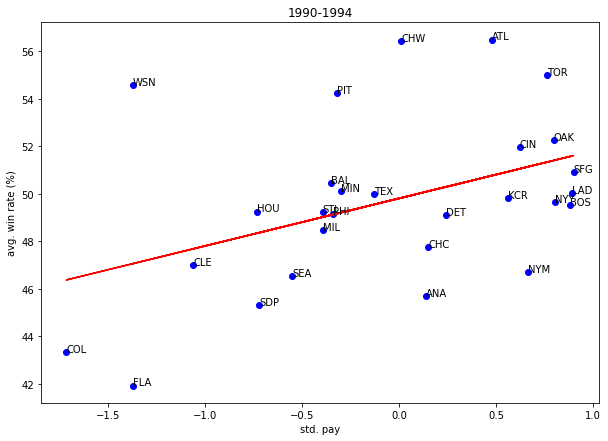

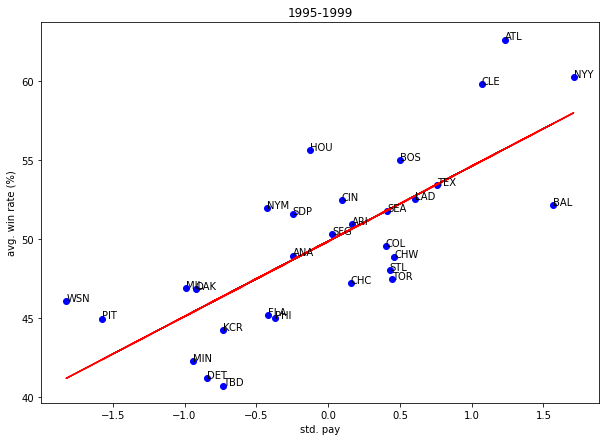

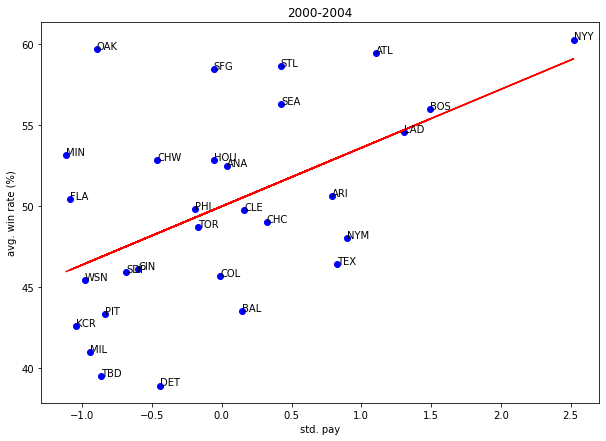

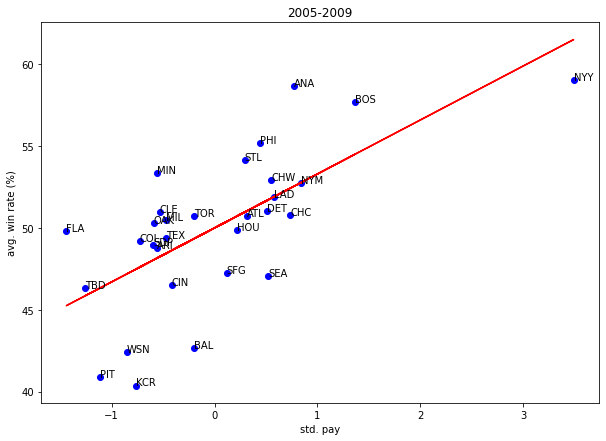

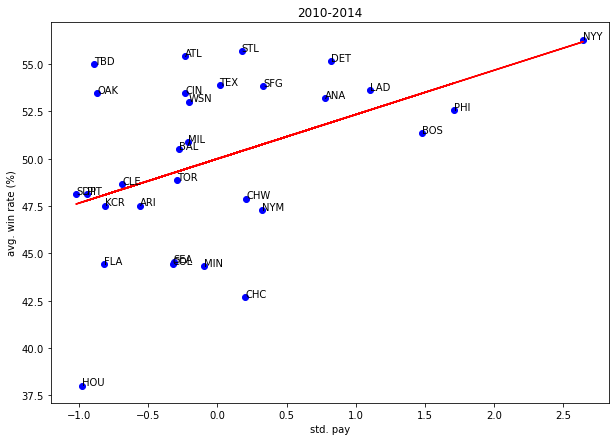

In [ ]:
titles = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']
for i in range(len(win.values())):
    x = np.array(list(pay[i].values()))
    y = np.array(list(win[i].values()))
    m, b = np.polyfit(x,y,1)

    mpl.figure(figsize=(10, 7))
    mpl.scatter(x, y, color='Blue')
    mpl.plot(x, (m*x) + b, color="Red")
    mpl.title(titles[i])
    mpl.xlabel("std. pay")
    mpl.ylabel("avg. win rate (%)")

    # This adds the labels to each point in the scatter plot
    for j in win[i].keys():
        mpl.text(x=pay[i][j], y=win[i][j], s=j)
    mpl.show()

By plotting against the standardization of the average payroll, we now have a meaningful zero compared to the plots we generated earlier. So now we can clearly see how some teams paid around the average, or even less than the average, and still did extremely well in regards to their win percentage over each of the time periods

In [ ]:
del data2_reordered['time group'] # We do not need this anymore!!!

For this I did the same thing that I had done for all of the previous plots, except now we are using the entire time period covered by the whole dataset instead of five smaller ones. For each row of the table, I gather the average win and payroll for the row's team for the ENTIRE time period and add it to my dictionaries, storing the data in an organized manner

In [ ]:
win = {}
pay = {}
for row in data2_reordered.iterrows():
    if win.get(row[1]['franchise'], -1) == -1:
        fran = row[1]['franchise']
        win[fran] = (data2_reordered.loc[data2_reordered['franchise'] == fran]['win_percent']).mean()
        pay[row[1]['franchise']] = (data2_reordered.loc[data2_reordered['franchise'] == fran]['std pay']).mean()

Now that I have this data, I can create one big plot with it

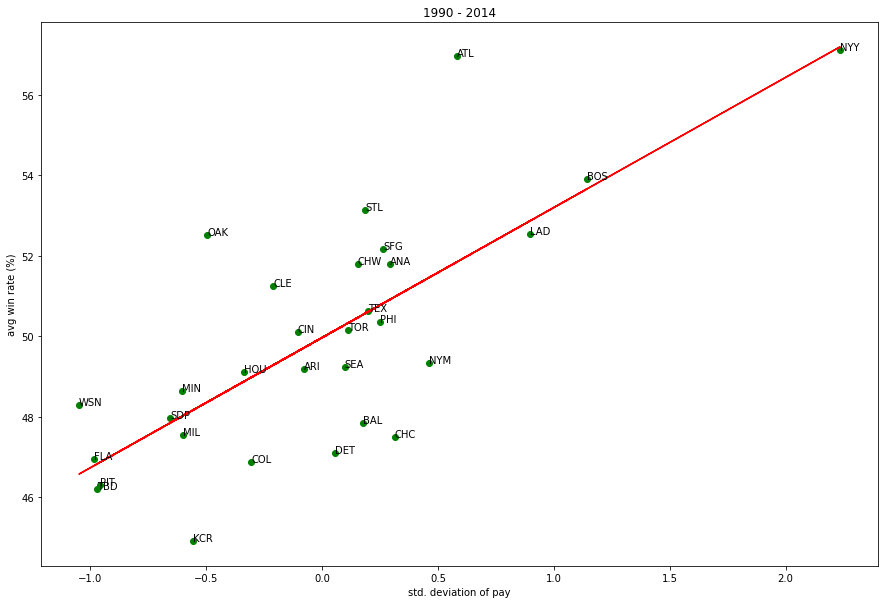

In [ ]:
title = "1990 - 2014"
x = np.array(list(pay.values()))
y = np.array(list(win.values()))
m, b = np.polyfit(x,y,1)

mpl.figure(figsize = (15, 10))
mpl.scatter(x, y, color='Green')
mpl.plot(x, (m*x) + b, color='Red')
mpl.title(title)
mpl.xlabel('std. deviation of pay')
mpl.ylabel('avg win rate (%)')

# This is to add labels to each point in the scatter plot
for key in win.keys():
    mpl.text(x=pay[key], y=win[key], s=key)
mpl.show()

The first thing that I am doing here is defining a function to return a team's EXPECTED win rate, based on the data

In [ ]:
def exp_win(std_pay):
    return 50 + (2.5 * std_pay)

Here I am gathering data to calculate a team's EFFICIENCY. To do this I am iterating through each row of the table in order by year and calculating the efficiency of each team in each year based off of the team's win percentage and the team's expected win percentage, as calculated by the function defined above

In [ ]:
eff = []
for row in data2_reordered.iterrows():
    eff.append(row[1]['win_percent'] - exp_win(row[1]['std pay']))
data2_reordered['efficiency'] = eff
data2_reordered

,year,team_ID,franchise,win_percent,payroll,std pay,efficiency
298,1990,KCA,KCR,46.583851,23361084.0,0.009273,-3.439332
378,1990,MIN,MIN,45.679012,14602000.0,-0.328735,-3.499151
50,1990,BAL,BAL,47.204969,9680084.0,-0.518669,-1.498360
626,1990,SLN,STL,43.209877,20523334.0,-0.100234,-6.539539
403,1990,ML4,MIL,45.679012,19719167.0,-0.131266,-3.992822
...,...,...,...,...,...,...,...
550,2014,PIT,PIT,54.320988,77178000.0,-0.637654,5.915123
377,2014,MIL,MIL,50.617284,101217000.0,-0.075165,0.805196
475,2014,NYN,NYM,48.765432,49448346.0,-1.286501,1.981685
24,2014,ARI,ARI,39.506173,97861500.0,-0.153680,-10.109626


For the plot for this next bit, we will only look at the teams Oakland, Boston, New York, Atlanta, and Tampa Bay. The first thing that I do here is create a smaller table (aptly named 'small') that is just the data from the larger table but ONLY for these teams, and ordering it by year

In [ ]:
small = data2_reordered.loc[(data2_reordered['team_ID'] == 'OAK') | (data2_reordered['team_ID'] == 'BOS') | (data2_reordered['team_ID'] == 'NYA') | (data2_reordered['team_ID'] == 'ATL') | (data2_reordered['team_ID'] == 'TBA')]

small = small.sort_values(['year'])

I then start to prepare the plot -- I store the list of years in a variable to be used as the x-axis, and then gather the lists of each team's efficiency, storing it in an appropriately-labeled variable

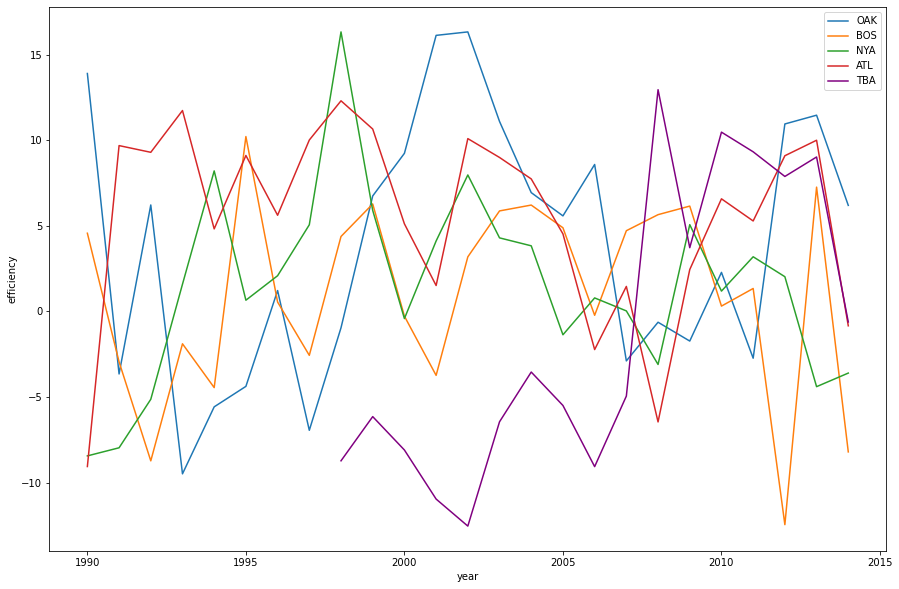

In [ ]:
mpl.figure(figsize=(15, 10))

x = small['year'].unique()

yOAK = small.loc[small['franchise'] == 'OAK']['efficiency']
yBOS = small.loc[small['franchise'] == 'BOS']['efficiency']
yNYA = small.loc[small['franchise'] == 'NYY']['efficiency']
yATL = small.loc[small['franchise'] == 'ATL']['efficiency']
yTBA = small.loc[small['franchise'] == 'TBD']

# This is just a list of y-axes to base EACH line off of
ys = [yOAK, yBOS, yNYA, yATL]
titles = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
titl = 0
for y in ys:
    # Plot EACH of these values along with the years as their x-axis
    mpl.plot(x, y, label=titles[titl])
    titl += 1

# Lastly, I declare the data for Tampa Bay in separate calls, because the x-axis is of a different size from all of the other values
x = yTBA['year']
y = yTBA['efficiency']

mpl.xlabel("year")
mpl.ylabel("efficiency")
mpl.plot(x, y, c='Purple', label=titles[i])
mpl.legend()
mpl.show()

With this table, we can see how efficient each team was across the time period of 1990-2014, and how each team's efficiency trended over time, as well as where each team had spikes, good or bad, in efficiency and how long they lasted. You can clearly see how Oakland's efficiency for winning surged during the moneyball period, and remained on top for some time around the following couple years.

Compared with the previous plots of this metric, this provides the clearest picture of which team was the best over certain time periods in terms of their efficiency of money spent and games won. Previous tables only looked at how each team's pay and win rate compared to the average,  and how MUCH better or worse teams were compared to the average based on their pay and win rate. This table takes all of that into account and actually shows the effectiveness of this data relative to each team